In [1]:
%matplotlib notebook
from slow_utils import *
from slow_model import *
import os
import numpy as np
from matplotlib import pyplot as plt

<IPython.core.display.Javascript object>


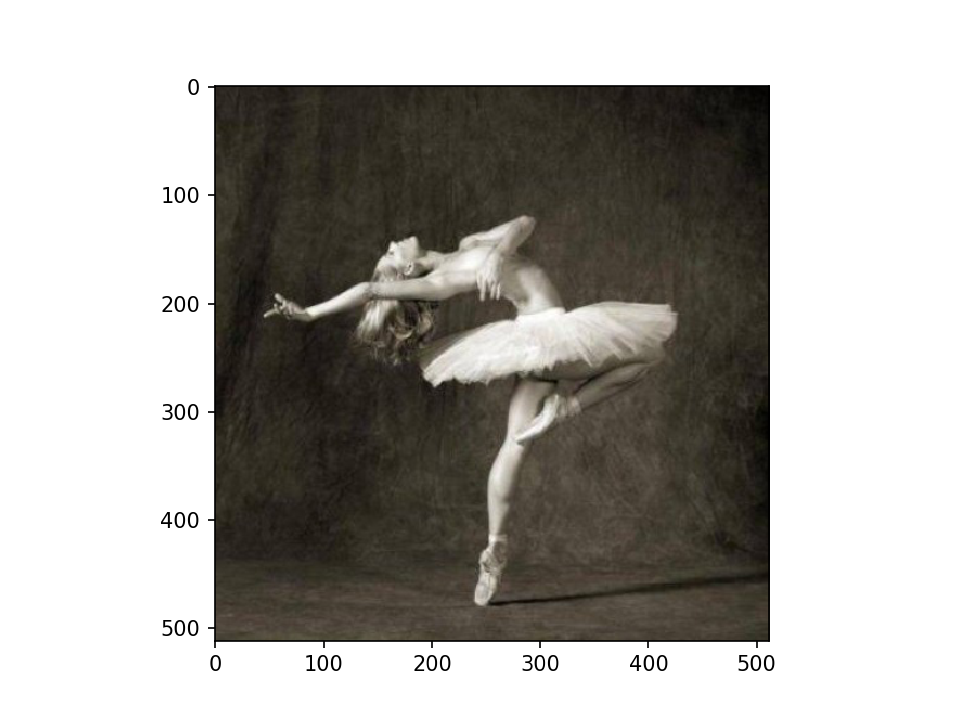

<IPython.core.display.Javascript object>


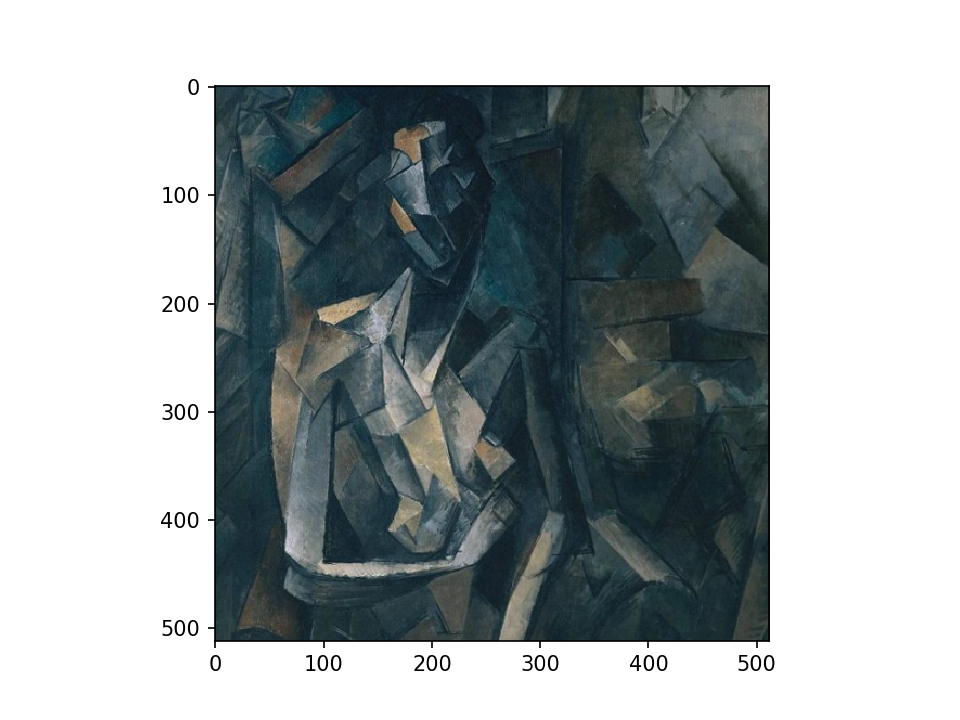

In [2]:
content_tensor, style_tensor = prep('./dancing.jpg','./picasso.jpg')
plt.figure()
imshow(content_tensor)
plt.figure()
imshow(style_tensor)

In [3]:
def run_style_transfer(net, fig, axes, num_steps=300,
                       style_weight=100000, content_weight=1):
    """Run the style transfer."""
    
    #input_img = net.content_target.clone() + 2 / 255 * 30 * torch.randn(net.content_target.shape).to(device)
    input_img = net.content_target.clone()
    optimizer = torch.optim.LBFGS([input_img.requires_grad_()])
    

    print('Optimizing..')
    run = [0]
    while run[0] <= num_steps:

        def closure():
            #values have to be between 0 and 1 in image
            input_img.data.clamp_(0, 1) 

            optimizer.zero_grad()
            net.forward(input_img)
            style_losses = net.style_loss
            content_losses = net.content_loss
            style_score = 0
            content_score = 0

            for sl in style_losses:
                style_score += sl
            for cl in content_losses:
                content_score += cl

            style_score *= style_weight
            content_score *= content_weight
            
            #These two vars are used for graphing
            net.running_style_loss.append(style_score.item()/(run[0]+1))
            net.running_content_loss.append(content_score.item()/(run[0]+1))
            

            loss = style_score + content_score
            loss.backward()

            run[0] += 1
            if run[0] % 25 == 0:
                plot(fig, axes, net.style_target, net.content_target, input_img,
                    net.running_content_loss[10:], net.running_style_loss[10:], run[0])                
                print("run {}:".format(run))
                print('Style Loss : {:4f} Content Loss: {:4f}'.format(
                    style_score.item(), content_score.item()))
                print()

            return loss

        optimizer.step(closure)

    input_img.data.clamp_(0, 1)

    return input_img

<IPython.core.display.Javascript object>


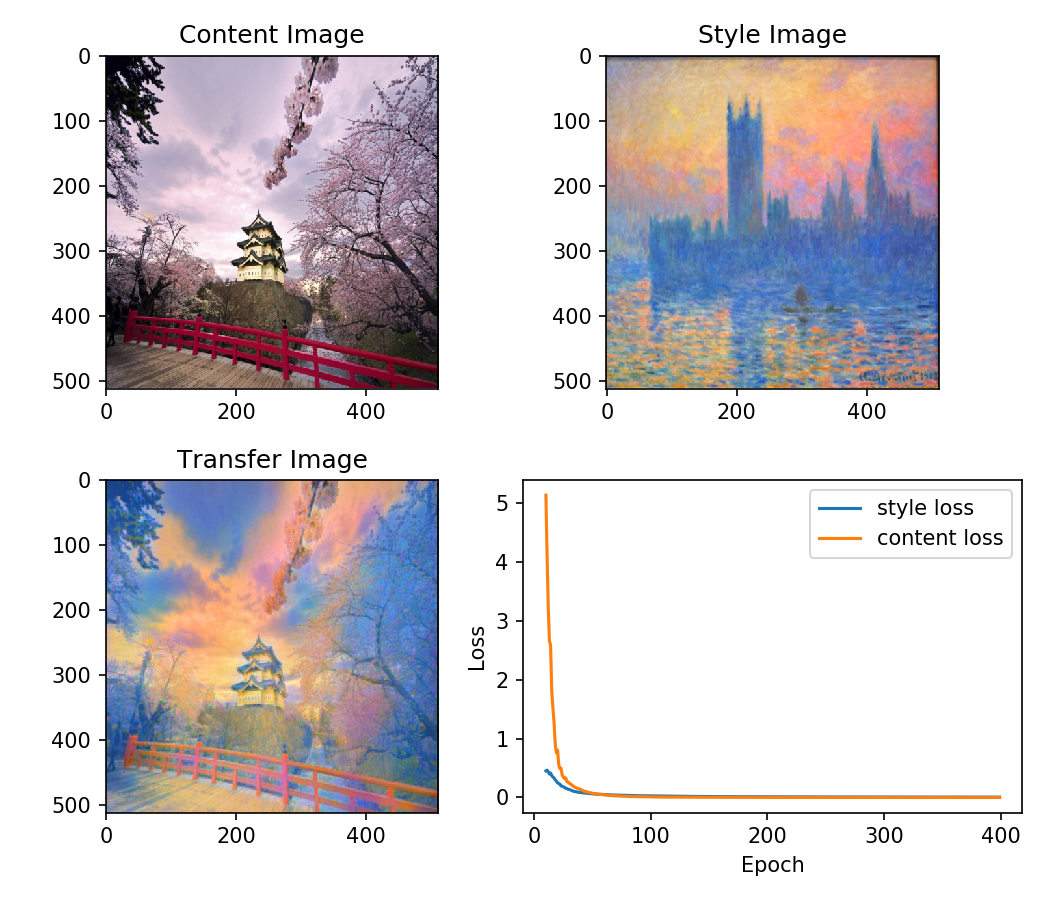

/datasets/home/home-03/78/978/achempak/Style/slow_model.py:47: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.mean = torch.tensor(mean).view(-1, 1, 1)
/datasets/home/home-03/78/978/achempak/Style/slow_model.py:48: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.std = torch.tensor(std).view(-1, 1, 1)


Sequential(
  (0): Normalization()
  (conv_1): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_1): Style()
  (relu_2): ReLU()
  (conv_2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_2): Style()
  (relu_3): ReLU()
  (avg_pool_3): AvgPool2d(kernel_size=3, stride=1, padding=1)
  (conv_3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_3): Style()
  (relu_4): ReLU()
  (conv_4): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (content_4): Content()
  (style_4): Style()
  (conv_5): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (style_5): Style()
)
Optimizing..
run [25]:
Style Loss : 9.340285 Content Loss: 4.769384

run [50]:
Style Loss : 3.799256 Content Loss: 3.210477

run [75]:
Style Loss : 1.893002 Content Loss: 2.851383

run [100]:
Style Loss : 1.016810 Content Loss: 2.687236

run [125]:
Style Loss : 0.600590 Content Loss: 2.564017

run [150]:
Style Loss : 0

In [4]:
cnn_normalization_mean = torch.tensor([0.485, 0.456, 0.406]).to(device)
cnn_normalization_std = torch.tensor([0.229, 0.224, 0.225]).to(device)
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(7,6))
content_tensor, style_tensor = prep('./cherry.jpg','./orange.jpg',(512,512))
net4 = Model(content_target=content_tensor, style_target=style_tensor, 
             normalization_mean=cnn_normalization_mean, normalization_std=cnn_normalization_std)
out = run_style_transfer(net=net4, fig=fig, axes=axes, num_steps=400)